<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Lab 5 – Sentiment Analysis</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques to perform sentiment analysis on textual data..**



**Guidelines**
* Download `Reviews.csv` file from D2L.
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections.

**Procedure**
* Save your work as `IPYNB` file named `Lab5.ipynb` and submit to D2L `Lab 5 – Sentiment Analysis (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook.

<div class="alert alert-block alert-info">

# Part 1: Activity

</div>

### Question 1: Read the content of the `Reviews.csv` into a dataframe called `reviews_df` and perform the following:
<hr style="border:1px solid orange"> </hr>

> **Q1.1.** Preprocess the `text` field content by performing the necessary steps to make it ready for applying sentiment analysis. Append the resulted preprocessed text to the `reviews_df` as a new column called `preprocessed_review`.

> **Q1.2.** Using nltk's `SentimentIntensityAnalyzer` module, get the `neg`, `neu`, `pos`, and `compound` scores of the `preprocessed_review` field and append the result to the `reviews_df` as new 4 columns-`neg`, `neu`, `pos`, and `compound`, respectively.


> **Q1.3.** Label each review in the `reviews_df` as either `pos` or `neg` based on the `compound` value for that specific review, and append the result to the dataframe as new column called `comp_score`. If the value of `compound` is greater than or equals to `zero`, then the `comp_score = 'pos'` and `'neg'` otherwise.

***After performing the first 3 parts, your dataframe should look like the following:***

|Id|neg|neu|pos|compound|comp_score|ProductId|ProfileName|Score|Summary|Text|preprocessed_review
|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|:--|
|1|0.000|0.695|0.305|0.9441|pos|A3SGXH7AUHU8GW|delmartian|5|Good Quality Dog Food|I have bought several of the Vitality canned d...|I have bought several of the Vitality canned d...|
|2|0.079|0.853|0.068|-0.1027|neg|A1D87F6ZCVE5NK|dll pa|1|Not as Advertised|Product arrived labeled as Jumbo Salted Peanut...|Product arrived labeled as Jumbo Salted Peanut...|
|3|0.091|0.754|0.155|0.8265|pos|ABXLMWJIXXAIN|Natalia Corres "Natalia Corres"|4|"Delight" says it all|This is a confection that has been around a fe...|This is a confection that has been around a fe...|

> **Q1.4.** Using seaborn's `barplot`, plot the actual score of the review (The Score column of the dataframe) against the pos, neu, neg, and compound values. You should generate 4 plots for the for values against the actual score. The documentation for the seaborn barplot module can be found here  &rarr; [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)


> **Q1.5.** Based on the plots generated in `Q1.4`, discuss the results of the analysis.

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('varder_lexicon')

from nltk. sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading varder_lexicon: Package 'varder_lexicon' not
[nltk_data]     found in index
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Q1.1. Preprocess the text field content by performing the necessary steps to make it ready for applying sentiment analysis. Append the resulted preprocessed text to the reviews_df as a new column called preprocessed_review.**

In [10]:
# Q1.1.
# Reading the dataset
reviews_df = pd.read_csv("sample_data/Reviews.csv")
reviews_df.info()

# Removing the duplicates
reviews_df = reviews_df.drop_duplicates(subset=['ProductId', 'UserId', 'Text', 'Summary'])
reviews_df.info()

# Removing the Na values if any
reviews_df = reviews_df.dropna(subset=['Text'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568452 entries, 0 to 568451
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568452 non-null  int64 
 1   ProductId               568452 non-null  object
 2   UserId                  568452 non-null  object
 3   ProfileName             568426 non-null  object
 4   HelpfulnessNumerator    568452 non-null  int64 
 5   HelpfulnessDenominator  568452 non-null  int64 
 6   Score                   568452 non-null  int64 
 7   Time                    568452 non-null  int64 
 8   Summary                 568425 non-null  object
 9   Text                    568452 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 567554 entries, 0 to 568451
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------

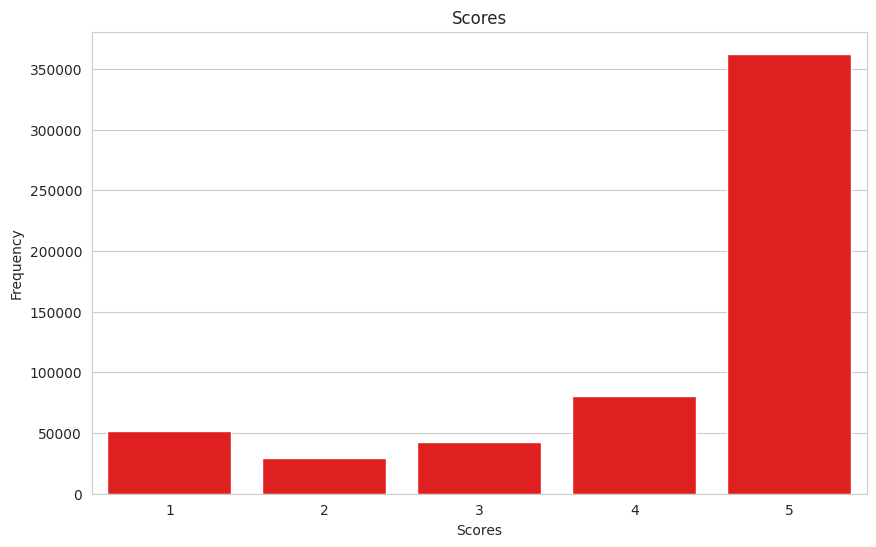

In [11]:
# Plotting Scores for their frequency

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(data=reviews_df, x='Score', color='red')
plt.title("Scores")
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Define preprocessing function

def preprocess_text(text):

    # convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra white space
    text = text.strip()

    # Tokenize
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if len(token)>1]
    return ' '.join(tokens)

In [13]:
# Applying the processing function to the reviews_df's 'Text' column and storing in a new column named preprocessed_review

reviews_df['preprocessed_review'] = reviews_df['Text'].apply(preprocess_text)
display(reviews_df.head())

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought several of the vitality canned dog...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is confection that has been around few ce...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at great price there was wide asso...


**Q1.2. Using nltk's SentimentIntensityAnalyzer module, get the neg, neu, pos, and compound scores of the preprocessed_review field and append the result to the reviews_df as new 4 columns-neg, neu, pos, and compound, respectively.**

In [14]:
# Using SentimentIntensityAnalyzer module to get the neg, neu, pos and compound scores

sentiment = SentimentIntensityAnalyzer()

res = {}
for i, row in reviews_df.iterrows():
    text = row['preprocessed_review']
    myid = row['Id']
    res[myid] = sentiment.polarity_scores(text)

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Merging the vaders daaset with the original reviews_df

vaders = vaders.merge(reviews_df, on='Id', how='left')
display(vaders.head())

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought several of the vitality canned dog...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is confection that has been around few ce...
3,4,0.000,0.925,0.075,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at great price there was wide asso...


**Q1.3. Label each review in the reviews_df as either pos or neg based on the compound value for that specific review, and append the result to the dataframe as new column called comp_score. If the value of compound is greater than or equals to zero, then the comp_score = 'pos' and 'neg' otherwise.**

In [15]:
# Labelling each review in the reviews_df as either pos or neg based on the compound value for that specific review,
# and appending the result to the dataframe as new column called comp_score.

vaders['comp_score'] = vaders['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
display(vaders.head())
vaders.info()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,preprocessed_review,comp_score
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,have bought several of the vitality canned dog...,pos
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,neg
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this is confection that has been around few ce...,pos
3,4,0.000,0.925,0.075,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,pos
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy at great price there was wide asso...,pos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567554 entries, 0 to 567553
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      567554 non-null  int64  
 1   neg                     567554 non-null  float64
 2   neu                     567554 non-null  float64
 3   pos                     567554 non-null  float64
 4   compound                567554 non-null  float64
 5   ProductId               567554 non-null  object 
 6   UserId                  567554 non-null  object 
 7   ProfileName             567528 non-null  object 
 8   HelpfulnessNumerator    567554 non-null  int64  
 9   HelpfulnessDenominator  567554 non-null  int64  
 10  Score                   567554 non-null  int64  
 11  Time                    567554 non-null  int64  
 12  Summary                 567527 non-null  object 
 13  Text                    567554 non-null  object 
 14  preprocessed_review 

Q1.4. Using seaborn's barplot, plot the actual score of the review (The Score column of the dataframe) against the pos, neu, neg, and compound values. You should generate 4 plots for the for values against the actual score. The documentation for the seaborn barplot module can be found here → seaborn.barplot

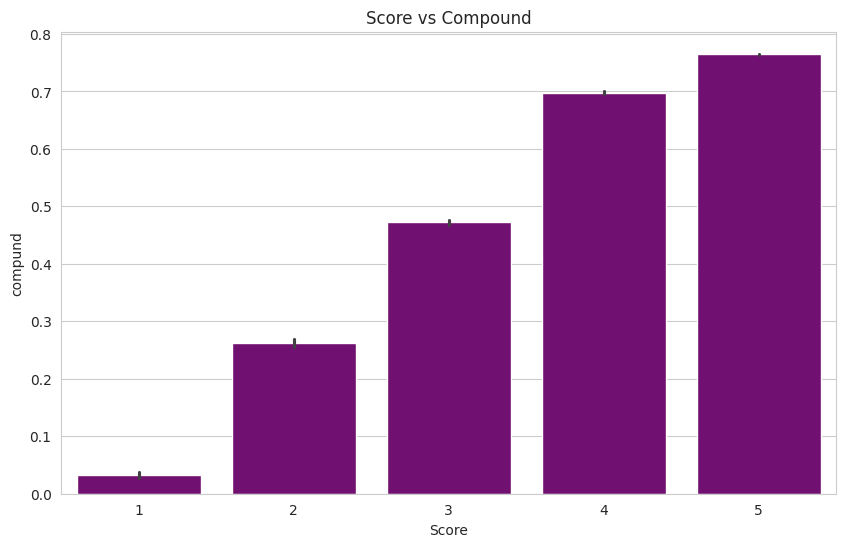

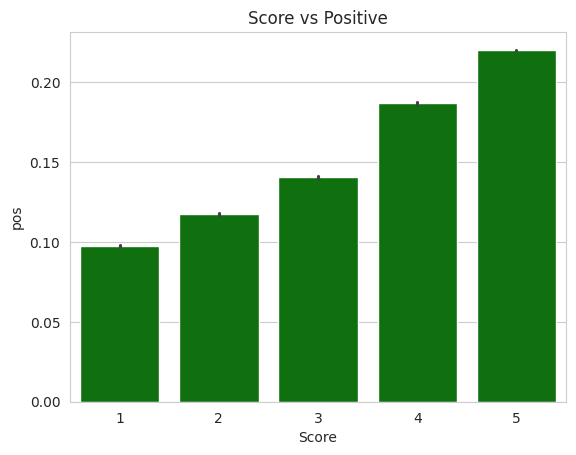

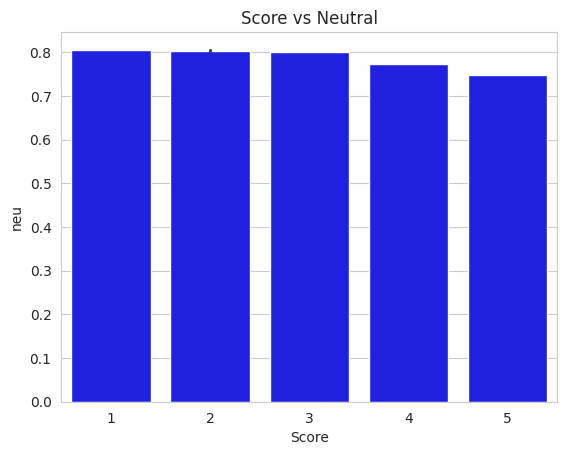

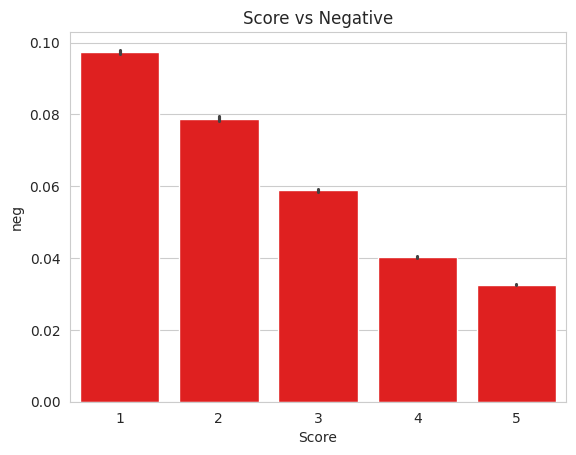

In [16]:
# Plotting the actual score of the review against the pos, neu, neg, and compound values

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=vaders, x='Score', y='compound', color='purple')
plt.title("Score vs Compound")
plt.xlabel('Score')
plt.ylabel('compund')
plt.show()

sns.barplot(data=vaders, x='Score', y='pos', color='green')
plt.title("Score vs Positive")
plt.xlabel('Score')
plt.ylabel('pos')
plt.show()

sns.barplot(data=vaders, x='Score', y='neu', color='blue')
plt.title("Score vs Neutral")
plt.xlabel('Score')
plt.ylabel('neu')
plt.show()

sns.barplot(data=vaders, x='Score', y='neg', color='red')
plt.title("Score vs Negative")
plt.xlabel('Score')
plt.ylabel('neg')
plt.show()

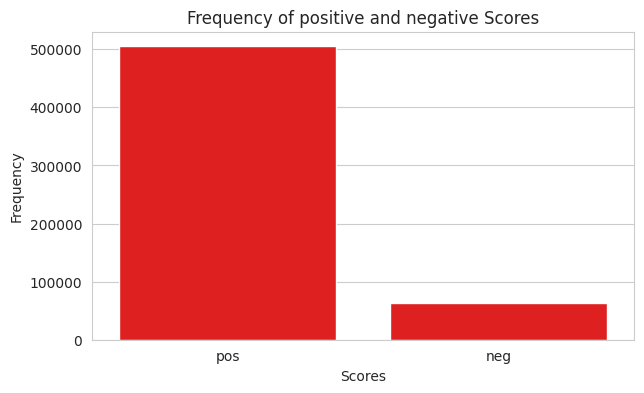

In [18]:
# Visualizes the frequency distribution of comp_scores from our 'vaders' dataset using a count plot.

sns.set_style("whitegrid")
plt.figure(figsize=(7,4))
sns.countplot(data=vaders, x='comp_score', color='red')
plt.title("Frequency of positive and negative Scores")
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

**Q1.5. Based on the plots generated in Q1.4, discuss the results of the analysis.**

1. Score vs Compound Sentiment:

The compound sentiment, which reflects the overall sentiment (both positive and negative combined), increases steadily as the score rises. It starts slightly above zero for a score of 1 and goes up to about 0.75 for a score of 5. This indicates that higher scores tend to be more strongly positive overall.

2. Score vs Positive Sentiment:

Positive sentiment increases with the score. A low score (like 1) has a lower positive sentiment (about 0.10), while a high score (like 5) shows a much higher positive sentiment (above 0.20). This tells us that better scores are associated with more positive feelings.

3. Score vs Neutral Sentiment:

As the score goes up from 1 to 5, the neutral sentiment drops. This means lower scores (like 1) are more neutral, while higher scores (like 5) have less neutrality. For example, a score of 1 has a higher neutral sentiment (around 0.80), but by score 5, the neutral sentiment drops to around 0.74.

4. Score vs Negative Sentiment:

As the score goes up from 1 to 5, the negative sentiment drops. This means lower scores (like 1) are more negative, while higher scores (like 5) have much less negativity. For example, a score of 1 has a higher negative sentiment (nearly 0.10), but by score 5, the negative sentiment drops to around 0.03.

The analysis shows that higher review scores (like 4 and 5) are connected with more positive words and less negative words in the reviews, while lower scores (like 1 and 2) tend to have more negative feelings and are more neutral. Interestingly, for reviews with a score of 1, the compound sentiment score is just above zero, which means that even though these reviews are mostly negative, they still have some balance of neutral or slightly positive words. This suggests that even the lowest-rated reviews may not be entirely negative, but still include some neutral or balanced opinions. Overall, sentiment analysis helps us see how customers feel about products based on their words, and these feelings usually match the review scores.

5. Analyzing the comp_score frequency distribution

The count plot of the comp_score shows a clear difference between positive and negative reviews. There are over 500,000 reviews with positive scores, while just around 50,000 reviews have negative scores. This means most reviews in the dataset are positive. The imbalance between positive and negative reviews could impact sentiment analysis models, as they may be more focused on identifying positive sentiments. Understanding this distribution helps in preparing for further NLP tasks.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity.
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells.

**1. A reflection of your experience performing the activity.**

This activity helped me grasp how sentiment analysis directly reflects real-world opinions through data visualization. I connected sentiment values to scores and saw firsthand how feedback translates into positive or negative emotions. This hands-on experience made it clear how data can be used to derive valuable insights.

**2. A reflection on the importance of learning this activity.**


This activity is crucial because it shows how data analysis can reveal important patterns, especially when it comes to understanding people’s opinions or feedback. I can make more informed decisions in business, research, or other areas where emotions and attitudes matter by visualizing the sentiments. It strengthens the ability to work with real-world data.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab5.ipynb** to the **Lab 5 – Sentiment Analysis (Dropbox)** on D2L by the due date.

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection